#                         Part 2 of rdKit training series!
##         Property calculation using rdkit, Applying drug-like filters, and More..
Credits : Andrea Volkamer, Michele Ritschel and Mathias Wajnberg

#### Import neccassarry rdkit libraries; use smiles to assign variables, and convert to Mol

In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [8]:
mol1 = Chem.MolFromSmiles('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1')
mol2 = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')

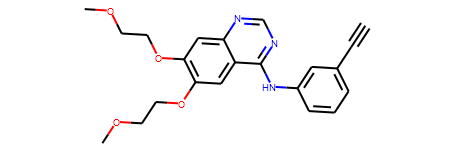

In [10]:
mol2

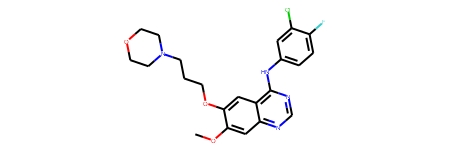

In [11]:
mol1

Lets calculate descriptors using rdKit. Refer this link to see the list of descriptors can be calculated using rdKit  : https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors

In [12]:
from rdkit.Chem import Descriptors

Lets calculate heavy atom count for Mol1

In [13]:
print (Descriptors.HeavyAtomCount(mol1))

31


In [14]:
print (Descriptors.HeavyAtomCount(mol2))

29


In [15]:
print ('Heavy Atom Count for Molecule-1;', Descriptors.HeavyAtomCount(mol1))

Heavy Atom Count for Molecule-1; 31


Lets explore more desciptors

In [16]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol1))
print ('H-bond donors:', Descriptors.NumHDonors(mol1))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol1))
print ('Molecular weight:', Descriptors.MolWt(mol1))
print ('LogP:', Descriptors.MolLogP(mol1))

Heavy atoms: 31
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 446.9100000000004
LogP: 4.275600000000003


In [17]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol2))
print ('H-bond donors:', Descriptors.NumHDonors(mol2))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol2))
print ('Molecular weight:', Descriptors.MolWt(mol2))
print ('LogP:', Descriptors.MolLogP(mol2))

Heavy atoms: 29
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 393.4430000000002
LogP: 3.405100000000002


Lets generate similarity Maps (using Crippen Contributions)

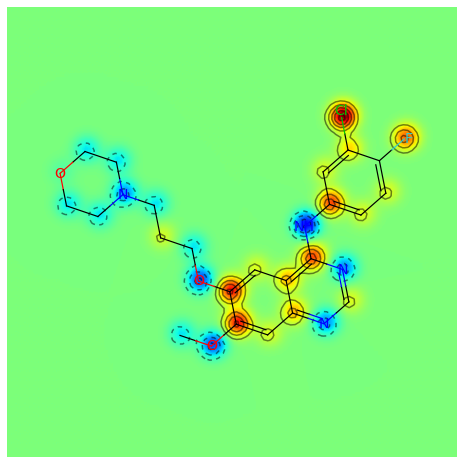

In [21]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps
contribs = rdMolDescriptors._CalcCrippenContribs(mol1)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol1,[x for x,y in contribs], colorMap='jet', contourLines=10)
#for more details about Crippen Contributions - refer : Scott A. WildmanGordon M. Crippen, Prediction of Physicochemical Parameters by Atomic Contributions

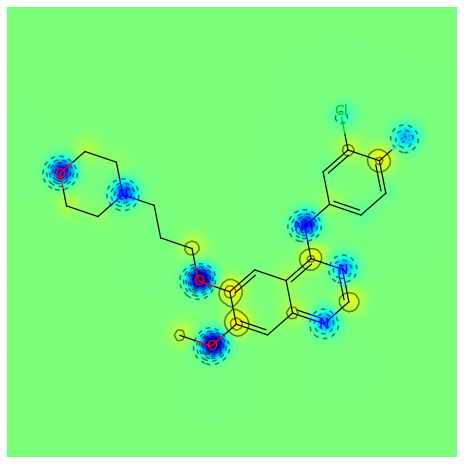

In [24]:
from rdkit.Chem import AllChem
AllChem.ComputeGasteigerCharges(mol1)
contribs = [mol1.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol1.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol1, contribs, colorMap='jet', contourLines=10)

Lets calculate descriptors for multiple molecules - 

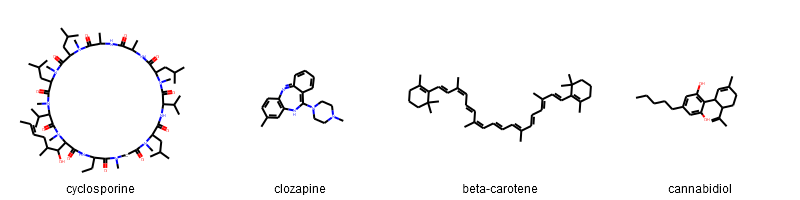

In [25]:
smiles_1 = 'CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C' # Cyclosporine
smiles_2 = 'CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C' # Clozapine
smiles_3 = 'CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C' # Beta-carotene
smiles_4 = 'CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O' # Cannabidiol
smiles_list = [smiles_1, smiles_2, smiles_3, smiles_4]
names_list = ['cyclosporine', 'clozapine', 'beta-carotene', 'cannabidiol']
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Draw.MolsToGridImage(mol_list, legends=names_list, molsPerRow=4)

In [26]:
MWs = [Descriptors.ExactMolWt(mol) for mol in mol_list]
HBAs = [Descriptors.NumHAcceptors(mol) for mol in mol_list]
HBDs = [Descriptors.NumHDonors(mol) for mol in mol_list]
LogPs = [Descriptors.MolLogP(mol) for mol in mol_list]

parameters = [MWs, HBAs, HBDs, LogPs]

In [30]:
print('LogPs of the four compounds:',parameters)

LogPs of the four compounds: [[1201.841367992, 306.184446704, 536.438201792, 314.2245802], [12, 4, 0, 2], [5, 1, 0, 2], [3.2690000000000063, 1.6849199999999989, 12.605799999999977, 5.846500000000007]]


Lets generate plot for property distribution (adding drug-like filters)

C:\Users\sunee\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


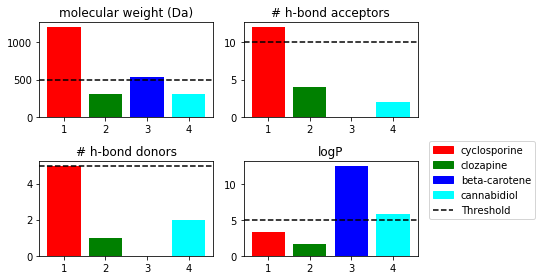

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from math import pi
import pandas as pd
import numpy as np

# Start 2x2 plot frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
axes = [ax1, ax2, ax3, ax4]
x = np.arange(1, len(mol_list)+1)
colors = ['red', 'green', 'blue', 'cyan']

# Create subplots
for index in x-1:
    axes[index].bar(x, parameters[index], color=colors)

# Add rule of five thresholds as dashed lines
ax1.axhline(y=500, color="black", linestyle="dashed")
ax1.set_title("molecular weight (Da)")
ax2.axhline(y=10, color="black", linestyle="dashed")
ax2.set_title("# h-bond acceptors")
ax3.axhline(y=5, color="black", linestyle="dashed")
ax3.set_title("# h-bond donors")
ax4.axhline(y=5, color="black", linestyle="dashed")
ax4.set_title("logP")

# Add legend
legend_elements = [mpatches.Patch(color=colors[i], label=names_list[i]) for i in range(len(mol_list))]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.25, 0.5))

# Fit subplots and legend into figure
plt.tight_layout()

plt.show()

Define Property filters (Drug-like rules)

In [32]:
def df_rule_of_five(df):
    
    smi = df['smiles']
    m = Chem.MolFromSmiles(smi)
    
    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    
    # Create pandas row for conditions results with values and information whether rule of five is violated
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, LogP, 'no'])

In [40]:
ChEMBL_df = pd.read_csv('./data/EGFR_compounds.csv', index_col=0)
print(ChEMBL_df.shape)
ChEMBL_df.head()

(4771, 5)


,molecule_chembl_id,units,IC50,smiles,pIC50
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
3,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910
4,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910


In [41]:
# Apply ruleOfFive to dataset to get rule of five results (may take a while)
rule5_prop_df = ChEMBL_df.apply(df_rule_of_five, axis=1)

# Name condition columns
rule5_prop_df.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']

In [45]:
# Concatenate dataset with computed values
ChEMBL_df = ChEMBL_df.join(rule5_prop_df)

In [46]:
# Delete empty rows --> rule of five
filtered_df = ChEMBL_df[ChEMBL_df['rule_of_five_conform']=='yes']

# Info about data
print('# of compounds in unfiltered data set:', len(ChEMBL_df))
print('# of compounds in filtered data set:', len(filtered_df))
print("# of compounds not compliant with Lipinski's rule of five:", (len(ChEMBL_df)-len(filtered_df)))

# Save filtered data 
filtered_df.to_csv('./data/EGFR_compounds_lipinski.csv', sep=';') 
filtered_df.head(10)

# of compounds in unfiltered data set: 4771
# of compounds in filtered data set: 4008
# of compounds not compliant with Lipinski's rule of five: 763


,molecule_chembl_id,units,IC50,smiles,pIC50,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL63786,nM,0.003,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879,349.021459,3,1,5.28910,yes
1,CHEMBL53711,nM,0.006,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849,343.043258,5,1,3.59690,yes
2,CHEMBL35820,nM,0.006,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849,387.058239,5,1,4.93330,yes
3,CHEMBL53753,nM,0.008,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910,329.027607,5,2,3.57260,yes
4,CHEMBL66031,nM,0.008,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910,339.011957,4,2,4.01220,yes
5,CHEMBL176582,nM,0.010,Cn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc12,11.000000,353.027607,5,1,4.02260,yes
6,CHEMBL29197,nM,0.025,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,10.602060,359.026939,5,1,4.15310,yes
7,CHEMBL174426,nM,0.025,Cn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc12,10.602060,353.027607,5,1,4.02260,yes
8,CHEMBL1243316,nM,0.030,CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)...,10.522879,477.136781,6,3,4.75878,yes
9,CHEMBL3613702,nM,0.037,Fc1cc(Nc2ncnc3ccc(NC(=O)C=C)cc23)cc(Cl)c1Cl,10.431798,376.029395,4,2,4.94380,yes
